In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,make_scorer
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

In [2]:
#loadData
df_train = pd.read_excel('dataTokopedia.xlsx')
df_test = pd.read_excel('dataShopee.xlsx')

In [3]:
X_train = df_train.iloc[:,6]
y_train = df_train.iloc[:,2]

In [4]:
X_test= df_test.iloc[:,6]
y_test = df_test.iloc[:,2]

In [5]:
#Split data train dan validasi tokopedia
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [6]:
# Feature extraction
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
X_val = vectorizer.transform(X_val)

In [7]:
# Oversampling menggunakan SMOTE pada train set
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)

# Random Forest

In [8]:
param_grid = {
    'n_estimators': [500],
    'max_depth': [20],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'class_weight': ['balanced','balanced_subsample']
}

In [9]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10)

In [10]:
# Proses ini bisa memakan waktu yang lama, tergantung dari ukuran data dan banyaknya kombinasi parameter model
CV_rfc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [20], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [500]})

In [11]:
CV_rfc.best_params_

{'class_weight': 'balanced',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [12]:
pred_val=CV_rfc.predict(X_val)

In [13]:
print("Accuracy for Random Forest on Val data: ",accuracy_score(y_val,pred_val))
print("F1_Score for Random Forest on Val data: ",f1_score(y_val, pred_val, average='weighted'))
print("precision_Score for Random Forest on Val data: ",precision_score(y_val, pred_val, average='weighted'))
print("recall_Score for Random Forest on Val data: " ,recall_score(y_val, pred_val,average='weighted'))

Accuracy for Random Forest on Val data:  0.758675799086758
F1_Score for Random Forest on Val data:  0.7712694024547729
precision_Score for Random Forest on Val data:  0.8279839229479581
recall_Score for Random Forest on Val data:  0.758675799086758


In [14]:
pred_test=CV_rfc.predict(X_test)

In [15]:
# Evaluate model performance
accuracy_test = accuracy_score(y_test, pred_test)
precision_test = precision_score(y_test, pred_test, average='weighted')
recall_test = recall_score(y_test, pred_test, average='weighted')
f1_test = f1_score(y_test, pred_test, average='weighted')

print("Akurasi_test : ",accuracy_test)
print("precision_test : ",precision_test)
print("recall_test : ", recall_test)
print("f1score_test : ",f1_test)

Akurasi_test :  0.6439732142857143
precision_test :  0.7383741501040625
recall_test :  0.6439732142857143
f1score_test :  0.6516347094497641


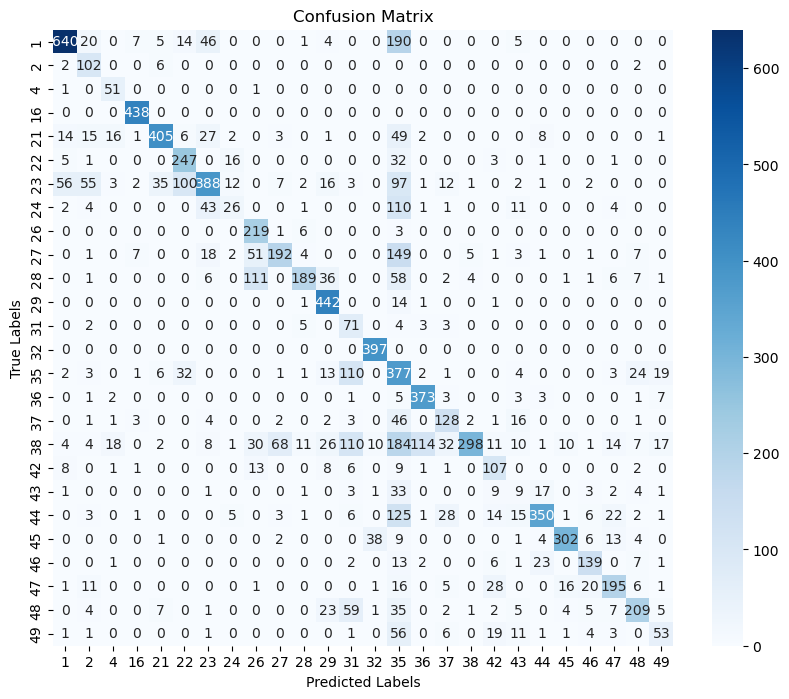

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create confusion matrix
labels = np.unique(y_test)
cm = confusion_matrix(y_test, pred_test, labels=labels)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels = labels, yticklabels= labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [17]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           1       0.87      0.69      0.77       932
           2       0.45      0.91      0.60       112
           4       0.55      0.96      0.70        53
          16       0.95      1.00      0.97       438
          21       0.87      0.74      0.80       550
          22       0.62      0.81      0.70       306
          23       0.71      0.49      0.58       795
          24       0.41      0.13      0.19       203
          26       0.51      0.96      0.67       229
          27       0.69      0.43      0.53       442
          28       0.85      0.45      0.59       423
          29       0.77      0.96      0.86       459
          31       0.19      0.81      0.31        88
          32       0.89      1.00      0.94       397
          35       0.23      0.63      0.34       599
          36       0.74      0.93      0.83       399
          37       0.57      0.61      0.59       210
          38       0.96    

In [18]:
# from sklearn.model_selection import cross_val_score
# f1_scorer = make_scorer(f1_score, average='weighted')
# scores = cross_val_score(CV_rfc, X_train, y_train, cv=10, scoring=f1_scorer)
# print('F1 scores for each fold:')
# print(scores)

# SVM

In [19]:
#SVM
from sklearn.svm import SVC
param_grid = {'C': [10], 'gamma': [0.1], 'kernel': ['linear']} 
grid = GridSearchCV(SVC(class_weight='balanced',random_state=42), param_grid, cv=10)
grid.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=10, estimator=SVC(class_weight='balanced', random_state=42),
             param_grid={'C': [10], 'gamma': [0.1], 'kernel': ['linear']})

In [20]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}

In [21]:
grid_predictions_val = grid.predict(X_val)

In [22]:
print("Accuacy_Score for SVM on CV data: " ,accuracy_score(y_val, grid_predictions_val))
print("f1_score for SVM on CV data : " ,f1_score(y_val, grid_predictions_val,average='weighted'))
print("precision_score for SVM on CV data : " ,precision_score(y_val, grid_predictions_val,average='weighted'))
print("recall_score for SVM on CV data : " ,recall_score(y_val, grid_predictions_val,average='weighted'))

Accuacy_Score for SVM on CV data:  0.9504566210045662
f1_score for SVM on CV data :  0.9504856513703991
precision_score for SVM on CV data :  0.9511721846132369
recall_score for SVM on CV data :  0.9504566210045662


In [23]:
grid_predictions_test = grid.predict(X_test)

In [24]:
print("Accuacy_Score for SVM Test data: " ,accuracy_score(y_test, grid_predictions_test))
print("f1_score for SVM on Test data : " ,f1_score(y_test, grid_predictions_test,average='weighted'))
print("precision_score for SVM Test data : " ,precision_score(y_test, grid_predictions_test,average='weighted'))
print("recall_score for SVM Test data : " ,recall_score(y_test, grid_predictions_test,average='weighted'))

Accuacy_Score for SVM Test data:  0.8534902597402597
f1_score for SVM on Test data :  0.8512545962324941
precision_score for SVM Test data :  0.8651064878465239
recall_score for SVM Test data :  0.8534902597402597


In [25]:
print(classification_report(y_test, grid_predictions_test))

              precision    recall  f1-score   support

           1       0.86      0.91      0.89       932
           2       0.94      0.95      0.94       112
           4       0.95      0.74      0.83        53
          16       0.99      1.00      1.00       438
          21       0.88      0.85      0.86       550
          22       0.96      0.96      0.96       306
          23       0.72      0.94      0.82       795
          24       0.59      0.26      0.36       203
          26       0.91      0.78      0.84       229
          27       0.78      0.89      0.83       442
          28       0.72      0.81      0.77       423
          29       0.99      0.88      0.93       459
          31       0.44      0.88      0.58        88
          32       0.97      0.99      0.98       397
          35       0.86      0.95      0.90       599
          36       0.89      0.96      0.92       399
          37       0.89      0.45      0.60       210
          38       0.94    

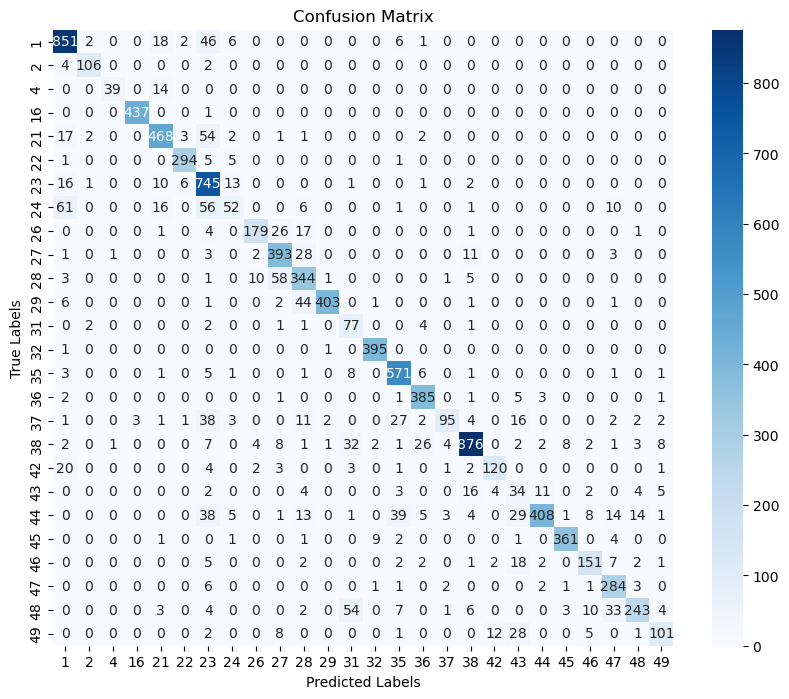

In [26]:
# Create confusion matrix
cm2 = confusion_matrix(y_test, grid_predictions_test)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g', xticklabels = labels, yticklabels= labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [27]:
# from sklearn.model_selection import cross_val_score
# f1_scorer = make_scorer(f1_score, average='weighted')
# scores = cross_val_score(grid, X_train, y_train, cv=10, scoring=f1_scorer)
# print('F1 scores for each fold:')
# print(scores)

# Multinomial Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB

In [29]:
nb = MultinomialNB()
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0],'fit_prior': [True, False]}

# Create GridCV object and fit to data
gridcv = GridSearchCV(MultinomialNB(), param_grid, cv=10)
gridcv.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0],
                         'fit_prior': [True, False]})

In [30]:
# Print best hyperparameters and corresponding score
print("Best hyperparameters: ", gridcv.best_params_)

Best hyperparameters:  {'alpha': 0.01, 'fit_prior': True}


In [31]:
pred_test=gridcv.predict(X_test)

In [32]:
print("Accuacy_Score for MNB Test data: " ,accuracy_score(y_test, pred_test))
print("f1_score for MNB on Test data : " ,f1_score(y_test, pred_test,average='weighted'))
print("precision_score for MNB Test data : " ,precision_score(y_test, pred_test,average='weighted'))
print("recall_score for MNB Test data : " ,recall_score(y_test, pred_test,average='weighted'))

Accuacy_Score for MNB Test data:  0.8041801948051948
f1_score for MNB on Test data :  0.8014494558788542
precision_score for MNB Test data :  0.8145201139303536
recall_score for MNB Test data :  0.8041801948051948


In [33]:
from sklearn.model_selection import cross_val_score
f1_scorer = make_scorer(f1_score, average='weighted')
scores = cross_val_score(gridcv, X_test, y_test, cv=10, scoring=f1_scorer)
print('F1 scores for each fold:')
print(scores)
print('F1 scores mean: ')
print(scores.mean())

F1 scores for each fold:
[0.88559811 0.86977462 0.8996859  0.93149478 0.93467864 0.8816474
 0.94864442 0.93372462 0.89828712 0.83020014]
F1 scores mean: 
0.9013735760847377


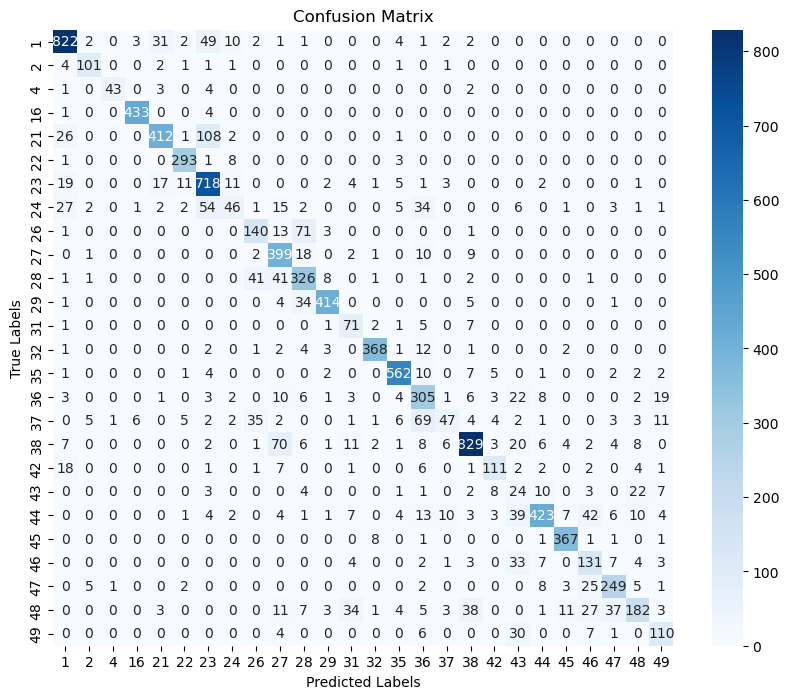

In [34]:
# Create confusion matrix
cm3 = confusion_matrix(y_test, pred_test)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm3, annot=True, cmap='Blues', fmt='g', xticklabels = labels, yticklabels= labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()